In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy as sp
%matplotlib inline

In [18]:
df =pd.read_csv('airline_delay_causes_fixed_2015_a.csv')

In [19]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
13523,12,WN,STL,2508.0,508.0,167.65,12.02,66.10,2.18,260.05,24.0,3.0,27471.0,8418.0,1807.0,2459.0,84.0,14703.0
13524,12,WN,TPA,2371.0,454.0,158.22,10.08,72.06,0.55,213.08,16.0,1.0,25323.0,8152.0,1154.0,2701.0,12.0,13304.0
13525,12,WN,TUL,383.0,100.0,36.25,2.96,8.66,0.00,52.12,4.0,0.0,5836.0,1847.0,336.0,384.0,0.0,3269.0
13526,12,WN,TUS,383.0,104.0,25.61,0.00,8.37,0.00,70.02,4.0,0.0,4859.0,1176.0,0.0,279.0,0.0,3404.0
13527,12,EV,TPA,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0,1,AA,JFK,1369.0,322.0,73.31,8.44,136.78,0.00,103.47,86.0,3.0,20055.0,5273.0,999.0,6358.0,0.0,7425.0
1,1,AA,LAX,2633.0,445.0,157.17,25.21,107.82,1.36,153.43,41.0,4.0,25261.0,10914.0,1460.0,3293.0,42.0,9552.0
2,1,AA,DFW,12466.0,2463.0,645.29,64.66,765.92,4.14,982.99,203.0,6.0,167313.0,66714.0,5055.0,24137.0,123.0,71284.0
3,1,AA,OGG,100.0,22.0,11.53,0.00,6.48,0.00,4.00,3.0,0.0,1776.0,1207.0,0.0,188.0,0.0,381.0
4,1,AA,HNL,169.0,50.0,28.69,0.00,15.04,0.00,6.27,0.0,4.0,4175.0,2602.0,0.0,523.0,0.0,1050.0


In [22]:
df.describe()

,V1,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
count,13528.000000,13516.000000,13513.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000,13516.000000
mean,6.413956,430.532628,78.697477,23.931182,2.666226,23.430341,0.144253,28.508060,6.650192,1.123631,4635.385247,1492.524120,229.375037,1060.651228,5.991788,1846.843075
std,3.458825,1115.642235,186.515356,50.583317,7.776620,63.208093,0.575962,74.588619,26.594440,4.865930,11952.951438,3769.542588,768.541935,3230.680921,26.410272,4946.382322
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,60.000000,9.000000,3.340000,0.000000,1.870000,0.000000,2.510000,0.000000,0.000000,486.000000,167.000000,0.000000,65.000000,0.000000,136.000000
50%,6.000000,132.000000,23.000000,8.640000,0.660000,5.520000,0.000000,7.310000,1.000000,0.000000,1278.000000,471.000000,31.000000,211.000000,0.000000,447.500000
75%,9.000000,318.000000,61.000000,21.675000,2.210000,15.615000,0.000000,19.232500,4.000000,1.000000,3421.500000,1256.250000,180.000000,622.500000,0.000000,1254.250000
max,12.000000,21648.000000,3077.000000,860.950000,240.790000,993.740000,15.460000,1113.320000,914.000000,160.000000,238004.000000,83815.000000,31960.000000,59015.000000,659.000000,82182.000000


In [23]:
#V1 = month
#V2 = carrier
#V3 = airport
#V4 = arr_flights in that particular airport
#V5 = arr_del15
#V6 = carrier_ct
#V7 = weather_ct
#V8 = nas_ct
#V9 = security_ct
#V10 = late_aircraft_ct
#V11 = arr_cancelled
#V12 = arr_diverted
#V13 = arr_delay
#V14 = carrier_delay (minutes)
#V15 = weather_delay (minutes)
#V16 = nas_delay (minutes)
#V17 = security_delay (minutes)
#V18 = late_aircraft_delay (minutes)

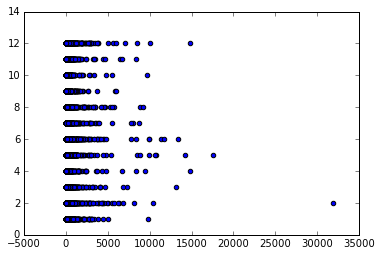

In [32]:
#cross-plotting in between pairs of attributes
#let us try to compare attributes in between weather delay and month

dataRow1 = df['V15']
dataRow2 = df['V1']

plot.scatter(dataRow1, dataRow2)    

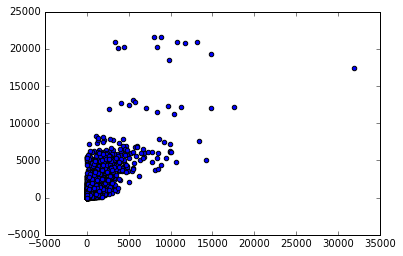

In [33]:
#correlation in between carrier delay and number of arrival of flights
dataRow3 = df['V15']
dataRow4 = df['V4']

plot.scatter(dataRow3, dataRow4)  

In [34]:
df.corr()

,V1,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
V1,1.000000,0.012332,-0.021949,-0.017541,-0.044866,-0.022136,0.048916,-0.019818,-0.100217,0.002972,-0.016701,-0.009391,-0.033413,-0.018537,0.038141,-0.016108
V4,0.012332,1.000000,0.935154,0.927694,0.781622,0.864239,0.416023,0.892017,0.538959,0.680248,0.920001,0.943171,0.746169,0.775170,0.383269,0.880137
V5,-0.021949,0.935154,1.000000,0.960541,0.812059,0.936508,0.452786,0.967170,0.651712,0.687323,0.984255,0.945386,0.773377,0.866323,0.404856,0.969836
V6,-0.017541,0.927694,0.960541,1.000000,0.788145,0.844341,0.446508,0.922404,0.551190,0.658213,0.935665,0.956397,0.737214,0.753393,0.402378,0.923423
V7,-0.044866,0.781622,0.812059,0.788145,1.000000,0.755724,0.349546,0.748584,0.569852,0.715098,0.818927,0.793001,0.953626,0.708467,0.305899,0.762080
V8,-0.022136,0.864239,0.936508,0.844341,0.755724,1.000000,0.426342,0.839503,0.653149,0.648058,0.937889,0.864722,0.733383,0.956522,0.389602,0.866653
V9,0.048916,0.416023,0.452786,0.446508,0.349546,0.426342,1.000000,0.423891,0.279742,0.302537,0.422228,0.409328,0.328596,0.357525,0.852219,0.419254
V10,-0.019818,0.892017,0.967170,0.922404,0.748584,0.839503,0.423891,1.000000,0.640662,0.646102,0.943027,0.896592,0.710332,0.767999,0.370805,0.981595
V11,-0.100217,0.538959,0.651712,0.551190,0.569852,0.653149,0.279742,0.640662,1.000000,0.421404,0.667798,0.572291,0.608856,0.648374,0.237571,0.658256
V12,0.002972,0.680248,0.687323,0.658213,0.715098,0.648058,0.302537,0.646102,0.421404,1.000000,0.712258,0.687234,0.690650,0.634036,0.263470,0.674617


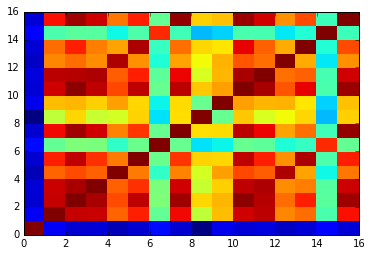

In [35]:
from pandas import DataFrame
corMat = df.corr()
plot.pcolor(corMat)
plot.show()

In [93]:
#parallel coordinate plot for data
#from math import exp

#df1 = df.fillna(0)

#summary = df1.describe()
#nRows = len(df1.index) 
#nCols = len(summary.columns)
#meanFlight = summary.iloc[1,nCols - 1]
#sdFlight = summary.iloc[2,nCols - 1]
#nDataCol = len(df1.columns) -1


In [92]:
#import matplotlib.pyplot as plot

#for i in range(nRows):
    #plor rows of data as if they were series data
#    dataRow = df1.iloc[i, 1:nDataCol]
#    normTarget =(df1.iloc[i,nDataCol] - meanFlight)/sdFlight
#    labelColor = 1.0 / (1.0 + exp(-normTarget))
#    dataRow.plot(color=plot.cm.RdYlBu(labelColor))



In [95]:
ua = df[df['V2'] == 'UA']

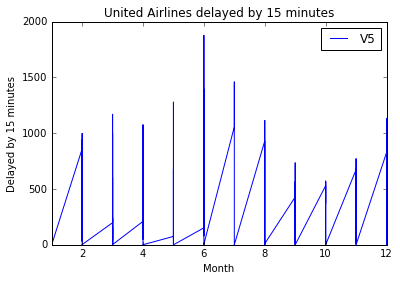

In [106]:
ua.plot(x='V1', y='V5')
plot.xlabel("Month")
plot.ylabel("Delayed by 15 minutes")
plot.title("United Airlines delayed by 15 minutes")